# 소셜게임의 매상 분석(검증형 데이터 분석)
>가상의 소셜게임 회사가 운영하는 가상의 소셜게임인 '퍼즐컬렉션'이 이번달에 들어 매상이 감소했습니다.</br>시장 환경이나 게임의 상태를 고려하면 아직은 더 성장할 것으로 예상했기 때문에 사내에서도 큰 문제로 인식하고 있습니다. </br>원인을 밝혀서 대책을 세우자며 분석 담당자에게 의뢰했습니다.

## 현실의 모습 / 이상적인 모습
* 현실의 모습
  - 지난달과 비교하여 이달의 매상이 감소한 것
* 이상적인 모습
  - 지난달과 동등한 매상 확보하기

## 문제 발견

* 문제
  - 지난달에 비해 매상이 감소했다. (사실)
* 가설
  - 광고에 문제가 생겼다. (가설)
  - 매월 테마를 바꿔서 개최하던 게임의 이벤트에 문제가 생겼다. (가설)
* 타 부서들과 질의응답 결과
  - 이달에는 예산 관계로 지난달만큼 광고를 하지 못했다. (사실)
  - 이벤트 내용은 지난달과 거의 비슷하다. (사실)

## 데이터 수집과 가공
### 데이터 분석 스토리 정리
* 문제
  - 지난달에 비해 매상이 감소했다. (사실)
  - 이달은 지난달에 비해 광고를 적게 했다. (사실)
  - 그래서 신규 유저수가 줄어들었다. (가설)
* 해결책
  - 광고를 지난달과 같은 수준으로 한다.
* 최종 스토리 정리
  - 퍼즐컬렉션의 매상이 지난달에 비해 줄어들었다. (사실)
  - 매상 내역을 보았더니 신규 유저의 매상이 감소했다. (가설)
  - 광고를 지난달과 같은 수준으로 실시한다. (해결책)
* 분석에 필요한 데이터 검토 (매상 내역을 조사하기 위함)
  - DAU(Daily Active User) : 하루에 한 번 이상 게임을 이용한 유저 데이터
  - DPU(Daily Payment User) : 하루에 1원 이상 지불한 유저 데이터
  - Install : 유저별로 게임을 이용하기 시작한 날짜가 기록된 데이터

In [110]:
#분석에 필요한 데이터 수집
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
#CSV 파일 읽어 들이기
dau = pd.read_csv('section3-dau.csv')
dpu = pd.read_csv('section3-dpu.csv')
install = pd.read_csv('section3-install.csv')

In [25]:
dau.info()
# log_date : 로그인한 날
# app_name : 앱 이름
# user_id : 유저 ID
print("============================================")
print(dau)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139112 entries, 0 to 139111
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   log_date  139112 non-null  object
 1   app_name  139112 non-null  object
 2   user_id   139112 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
          log_date app_name  user_id
0       2013-06-01  game-01      116
1       2013-06-01  game-01    13491
2       2013-06-01  game-01     7006
3       2013-06-01  game-01      117
4       2013-06-01  game-01    13492
...            ...      ...      ...
139107  2013-07-31  game-01    29326
139108  2013-07-31  game-01    29327
139109  2013-07-31  game-01    29328
139110  2013-07-31  game-01    29329
139111  2013-07-31  game-01    29330

[139112 rows x 3 columns]


In [24]:
dpu.info()
# log_date : 과금일
# app_name : 앱 이름
# user_id : 유저 ID
# payment : 과금액
print("============================================")
print(dpu)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   log_date  884 non-null    object
 1   app_name  884 non-null    object
 2   user_id   884 non-null    int64 
 3   payment   884 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 27.8+ KB
       log_date app_name  user_id  payment
0    2013-06-01  game-01      351    13330
1    2013-06-01  game-01    12796      810
2    2013-06-01  game-01      364     5710
3    2013-06-01  game-01    13212     6480
4    2013-06-01  game-01    13212    11420
..          ...      ...      ...      ...
879  2013-07-26  game-01    28342      810
880  2013-07-25  game-01    28371      810
881  2013-07-27  game-01    28433     5710
882  2013-07-27  game-01    28433      810
883  2013-07-31  game-01    29154      810

[884 rows x 4 columns]


In [23]:
install.info()
# install_date : 이용시작한 날
# app_name : 앱 이름
# user_id : 유저 ID
print("============================================")
print(install)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   install_date  29330 non-null  object
 1   app_name      29330 non-null  object
 2   user_id       29330 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 687.5+ KB
      install_date app_name  user_id
0       2013-04-15  game-01        1
1       2013-04-15  game-01        2
2       2013-04-15  game-01        3
3       2013-04-15  game-01        4
4       2013-04-15  game-01        5
...            ...      ...      ...
29325   2013-07-31  game-01    29326
29326   2013-07-31  game-01    29327
29327   2013-07-31  game-01    29328
29328   2013-07-31  game-01    29329
29329   2013-07-31  game-01    29330

[29330 rows x 3 columns]


In [31]:
# 분석에 필요한 데이터 가공(전처리)
# 매상 감소가 신규 유저의 영향인지 그렇지 않은지 판단하기 위함
# 유저(DAU)데이터에 이용시작(Install) 데이터 결합하기
dau_install = pd.merge(dau, install, on=['user_id', 'app_name'],how='left')
dau_install

,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-01,game-01,13491,2013-06-01
2,2013-06-01,game-01,7006,2013-05-03
3,2013-06-01,game-01,117,2013-04-17
4,2013-06-01,game-01,13492,2013-06-01
...,...,...,...,...
139107,2013-07-31,game-01,29326,2013-07-31
139108,2013-07-31,game-01,29327,2013-07-31
139109,2013-07-31,game-01,29328,2013-07-31
139110,2013-07-31,game-01,29329,2013-07-31


In [28]:
# 위 데이터에 과금(DPU) 데이터 다시 결합하기
dau_install_payment = pd.merge(dau_install, dpu, on=['log_date','app_name','user_id'], how='left')
dau_install_payment

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-01,game-01,13491,2013-06-01,NaN
2,2013-06-01,game-01,7006,2013-05-03,NaN
3,2013-06-01,game-01,117,2013-04-17,NaN
4,2013-06-01,game-01,13492,2013-06-01,NaN
...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,NaN
139291,2013-07-31,game-01,29327,2013-07-31,NaN
139292,2013-07-31,game-01,29328,2013-07-31,NaN
139293,2013-07-31,game-01,29329,2013-07-31,NaN


In [37]:
# 비과금 유저(결측값) 확인
print(dau_install_payment.isnull().sum())
# 비과금 유저의 과금액에 0 넣기
dau_install_payment = dau_install_payment.fillna(0)
dau_install_payment = dau_install_payment[['log_date','user_id','install_date','payment']]
dau_install_payment

log_date             0
app_name             0
user_id              0
install_date         0
payment         138411
dtype: int64


,log_date,user_id,install_date,payment
0,2013-06-01,116,2013-04-17,0.0
1,2013-06-01,13491,2013-06-01,0.0
2,2013-06-01,7006,2013-05-03,0.0
3,2013-06-01,117,2013-04-17,0.0
4,2013-06-01,13492,2013-06-01,0.0
...,...,...,...,...
139290,2013-07-31,29326,2013-07-31,0.0
139291,2013-07-31,29327,2013-07-31,0.0
139292,2013-07-31,29328,2013-07-31,0.0
139293,2013-07-31,29329,2013-07-31,0.0


In [101]:
# 월차로 변경하기 (지난달과 이달의 차이를 확인해야 하기 때문)
dau_install_payment['log_date']=pd.to_datetime(dau_install_payment["log_date"])
dau_install_payment['install_date']=pd.to_datetime(dau_install_payment["install_date"])
dau_install_payment['log_date']=dau_install_payment['log_date'].dt.strftime('%Y-%m')
dau_install_payment['install_date']=dau_install_payment['install_date'].dt.strftime('%Y-%m')
# 월차별 데이터 집계하기
df_grouped = dau_install_payment.groupby(['log_date','user_id','install_date'])['payment'].sum()
df_grouped=df_grouped.reset_index()
df_grouped

,log_date,user_id,install_date,payment
0,2013-06,1,2013-04,0.0
1,2013-06,2,2013-04,0.0
2,2013-06,3,2013-04,149940.0
3,2013-06,4,2013-04,0.0
4,2013-06,6,2013-04,0.0
...,...,...,...,...
27031,2013-07,29326,2013-07,0.0
27032,2013-07,29327,2013-07,0.0
27033,2013-07,29328,2013-07,0.0
27034,2013-07,29329,2013-07,0.0


In [126]:
# 월차별 데이터에 신규 유저인지 기존 유저인지 구분하는 항목 추가하기
for i in range(len(df_grouped)):
    if df_grouped['log_date'][i]!=df_grouped['install_date'][i] :
        df_grouped['user_type'][i]='old'
    else :
        df_grouped['user_type'][i]='new'

df_grouped

,log_date,user_id,install_date,payment,user_type
0,2013-06,1,2013-04,0.0,old
1,2013-06,2,2013-04,0.0,old
2,2013-06,3,2013-04,149940.0,old
3,2013-06,4,2013-04,0.0,old
4,2013-06,6,2013-04,0.0,old
...,...,...,...,...,...
27031,2013-07,29326,2013-07,0.0,new
27032,2013-07,29327,2013-07,0.0,new
27033,2013-07,29328,2013-07,0.0,new
27034,2013-07,29329,2013-07,0.0,new


In [128]:
# 지난달과 이달 데이터로 신규/기존 유저별 과금액을 집계한 결과
df=df_grouped.groupby(['log_date','user_type'])['payment'].sum()
df.reset_index()

,log_date,user_type,payment
0,2013-06,new,498370.0
1,2013-06,old,1778860.0
2,2013-07,new,291990.0
3,2013-07,old,1778860.0


## 데이터 분석
* 그래프로 데이터를 시각화하기

In [142]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

Text(0, 0.5, '매상액')

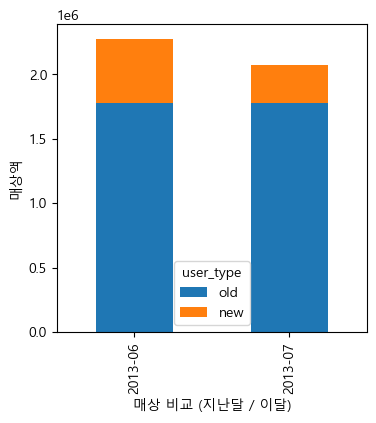

In [146]:
#퍼즐컬렉션의 매상 비교 (지난달 / 이달)
df2= df_grouped.groupby(['log_date','user_type'])['payment'].sum().unstack()
df2=df2[['old','new']]
df2.plot(kind='bar', figsize=(4,4), stacked=True)
plt.xlabel("매상 비교 (지난달 / 이달)")
plt.ylabel('매상액')

* 처음 세웠던 가설(매상 내역을 보았더니 신규 유저의 매상이 감소했다)을 입증할 만한 결과가 나왔다.

* 그렇다면 여기서 신규 유저중 어떤 과금액 층이 줄어들었는지 좀 더 자세히 살펴보자.

In [148]:
#신규 유저 데이터만 골라서 히스토그램을 통해 지난달과 이달 매상 비교 
#신규 유저 데이터 추출
df_grouped_new=df_grouped[df_grouped['user_type'] == 'new']
df_grouped_new
df_grouped_new_yespay =df_grouped_new[df_grouped_new['payment'] > 0 ]
yespay_06 = df_grouped_new_yespay[df_grouped_new_yespay['log_date'] == '2013-06']
yespay_07 = df_grouped_new_yespay[df_grouped_new_yespay['log_date'] == '2013-07'] 

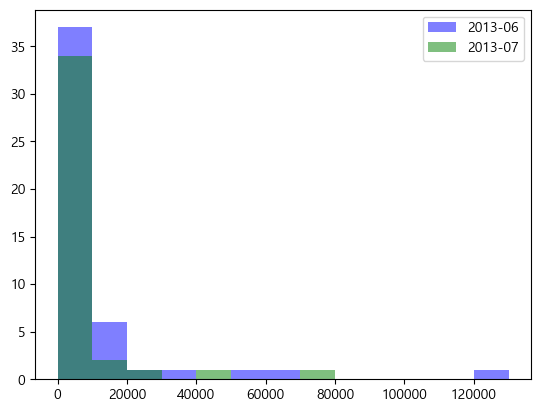

In [183]:
#월별 신규 유저수 비교
plt.hist(yespay_06['payment'],color='blue',bins=[i for i in range(0,140000,10000)],label='2013-06' ,histtype='bar',alpha=0.5)
plt.hist(yespay_07['payment'],color='green',bins=[i for i in range(0,140000,10000)],label='2013-07' ,histtype='bar',alpha=0.5)
plt.legend()
plt.show()

* 20000원 이하의 유저가 감소한 것을 확인할 수 있음
* 비즈니스 데이터는 이와 같이 멱법칙 분포를 보일때가 많음
* 어떤 장르의 상품 매상 상황, 여행지 인기도, 어떤 시간 구간의 검색어 수 등 사람의 심리가 반영되는 데이터들

## 데이터 분석 결과

#### 세웠던 가설
- 퍼즐컬렉션의 매상이 지난달에 비해 줄어들었다. (사실)
- 매상 내역을 보았더니 신규 유저의 매상이 감소했다. (가설)
- 광고를 지난달과 같은 수준으로 실시한다. (해결책)

#### 분석 후 얻어낸 것
- 퍼즐컬렉션의 매상이 지난달에 비해 떨어졌다. (사실)
- 매상 구조를 보았더니 신규 유저의 매상의 감소했으며, 그중에서도 20,000원 이하의 라이트 유저의 감소 영향이 컸다. (사실)
- 광고를 지난달과 같은 수준으로 실시한다. (데이터 분석으로 얻어낸 신빙성이 높아 보이는 해결책)

## 액션
> 신규 유저의 과금자수가 감소하였고, 특히 소액과금자(20,000원 이하의 라이트 유저)가 줄고 있음을 알게 되었다. </br>따라서 광고를 지난달과 같은 수준으로 하여 신규 유저를 늘릴 가능성이 있고 그렇다면 소액과금자가 늘어나 매상이 지난달과 같은 수준으로 회복할 것이다.


## 정리
#### 히스토그램을 통한 데이터 분석 진행
>지난달과 비교하여 매상이 떨어진 것을 문제로 정의하여 그 원인을 찾아보았고, 비지니스의 데이터 분석에서 중요한 것은 데이터를 분석하기 전에 관계부서와 가급적 많은 질의응답을 통해 사실을 파악하는 것이라고 느꼈음.</br> 또한 그런 정보를 파악한 후 실현 가능한 스토리를 관계자들과 함께 생각하고, 데이터를 활용해서 검증하는 것 또한 중요하다고 느낌.